In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes = True)
pd.set_option('display.max_columns', True)

In [80]:
df = pd.read_csv('superstore_data.csv')

In [81]:
#data preprocessing
df.drop(columns= 'Id', inplace= True)

In [82]:
#check the number of unique value from all of the object datatype
df.select_dtypes(include='object').nunique()

Education           5
Marital_Status      8
Dt_Customer       663
dtype: int64

In [83]:
#extract the last four digits from 'Dt_Customer' column
df['Dt_Customer']= df['Dt_Customer'].str[-4:]


In [84]:
#check the number of unique value from all of the object dtype
df.select_dtypes(include='object').nunique()


Education         5
Marital_Status    8
Dt_Customer       3
dtype: int64

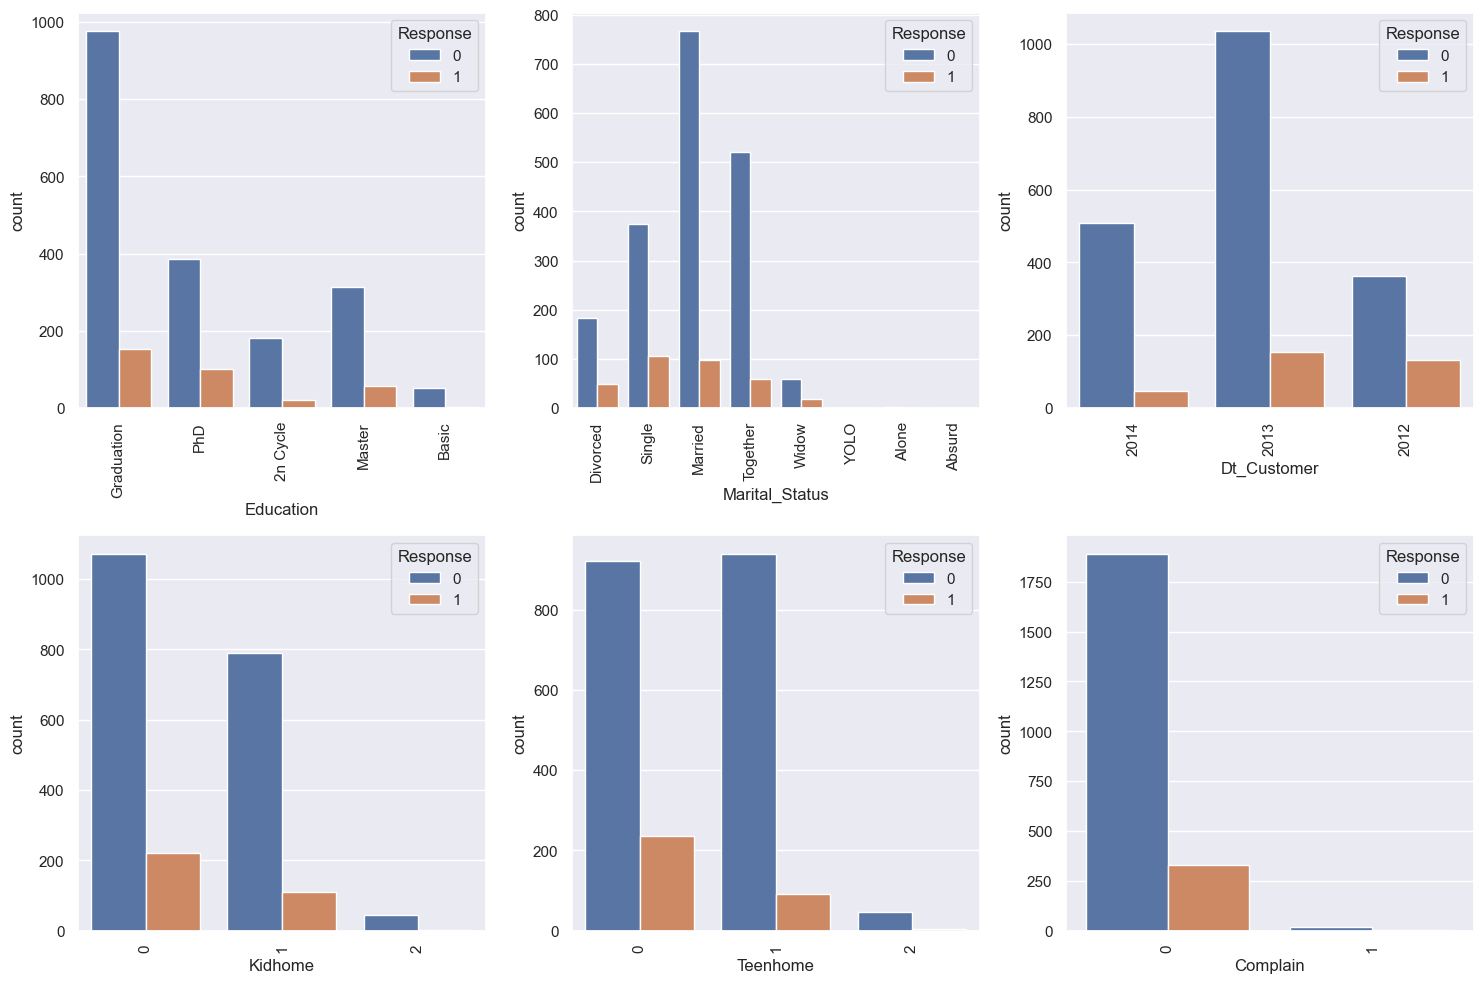

In [85]:
#explanatory Data Analysis
#list of categorical variables to plot
cat_vars = ['Education', 'Marital_Status', 'Dt_Customer','Kidhome', 'Teenhome','Complain']

#create figure with subplots
fig,axs = plt.subplots(nrows= 2, ncols = 3, figsize = (15,10))
axs = axs.flatten()

#create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x= var, hue ='Response', data = df, ax= axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation =90)

#adjust the spacing between subplots
fig.tight_layout()

#show plot
plt.show()




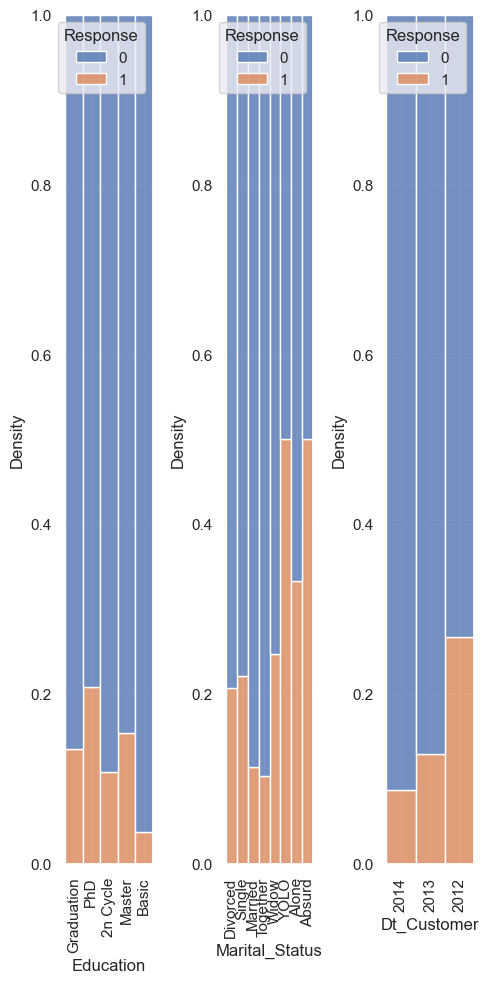

In [86]:
import warnings
warnings.filterwarnings("ignore")

#get list of categorical variables
cat_vars = ['Education', 'Marital_Status','Dt_Customer']

#create figure with subplots
fig, axs = plt.subplots(nrows= 1, ncols= 3, figsize=(5,10))
axs.flatten()

#create histplot for each categorical variables
for i, var in enumerate(cat_vars):
    sns.histplot(x= var, hue= 'Response', data = df, ax= axs[i], multiple='fill', kde = False, element="bars", fill = True, stat='density')
    axs[i].set_xticklabels(df[var].unique(), rotation =90)
    axs[i].set_xlabel(var)

#adjust spacing between subplots
fig.tight_layout()

#show plot
plt.show()

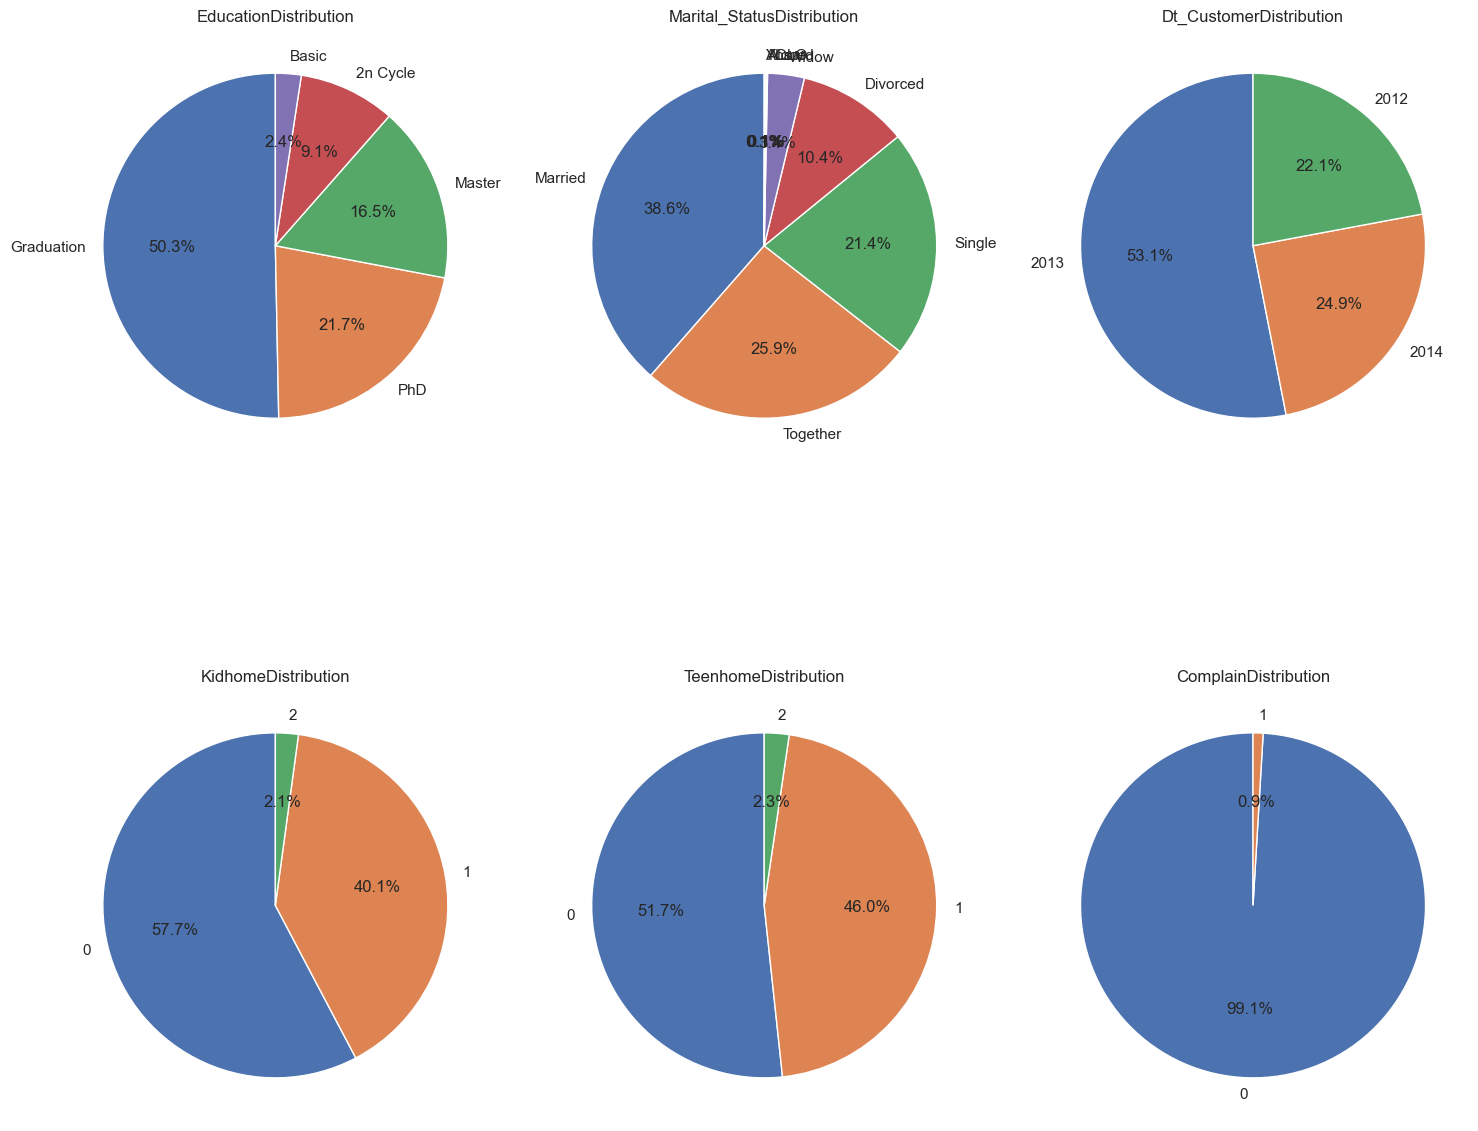

In [87]:
cat_vars = ['Education', 'Marital_Status','Dt_Customer','Kidhome','Teenhome', 'Complain']

#create a figure and axes
fig, axs = plt.subplots(nrows =2, ncols= 3, figsize = (15,15))

#create a pie chart for each categorical variable

for i,var in enumerate(cat_vars):
    if i<len(axs.flat):
        #count the number of coccurrences for each category
        cat_counts = df[var].value_counts()

        #create a pie chart 
        axs.flat[i].pie(cat_counts, labels = cat_counts.index, autopct = '%1.1f%%', startangle = 90)
        
        #set a title for each subplot
        axs.flat[i].set_title(f'{var}Distribution')

#adjust spacign between subplots
fig.tight_layout()

#show the plot
plt.show()

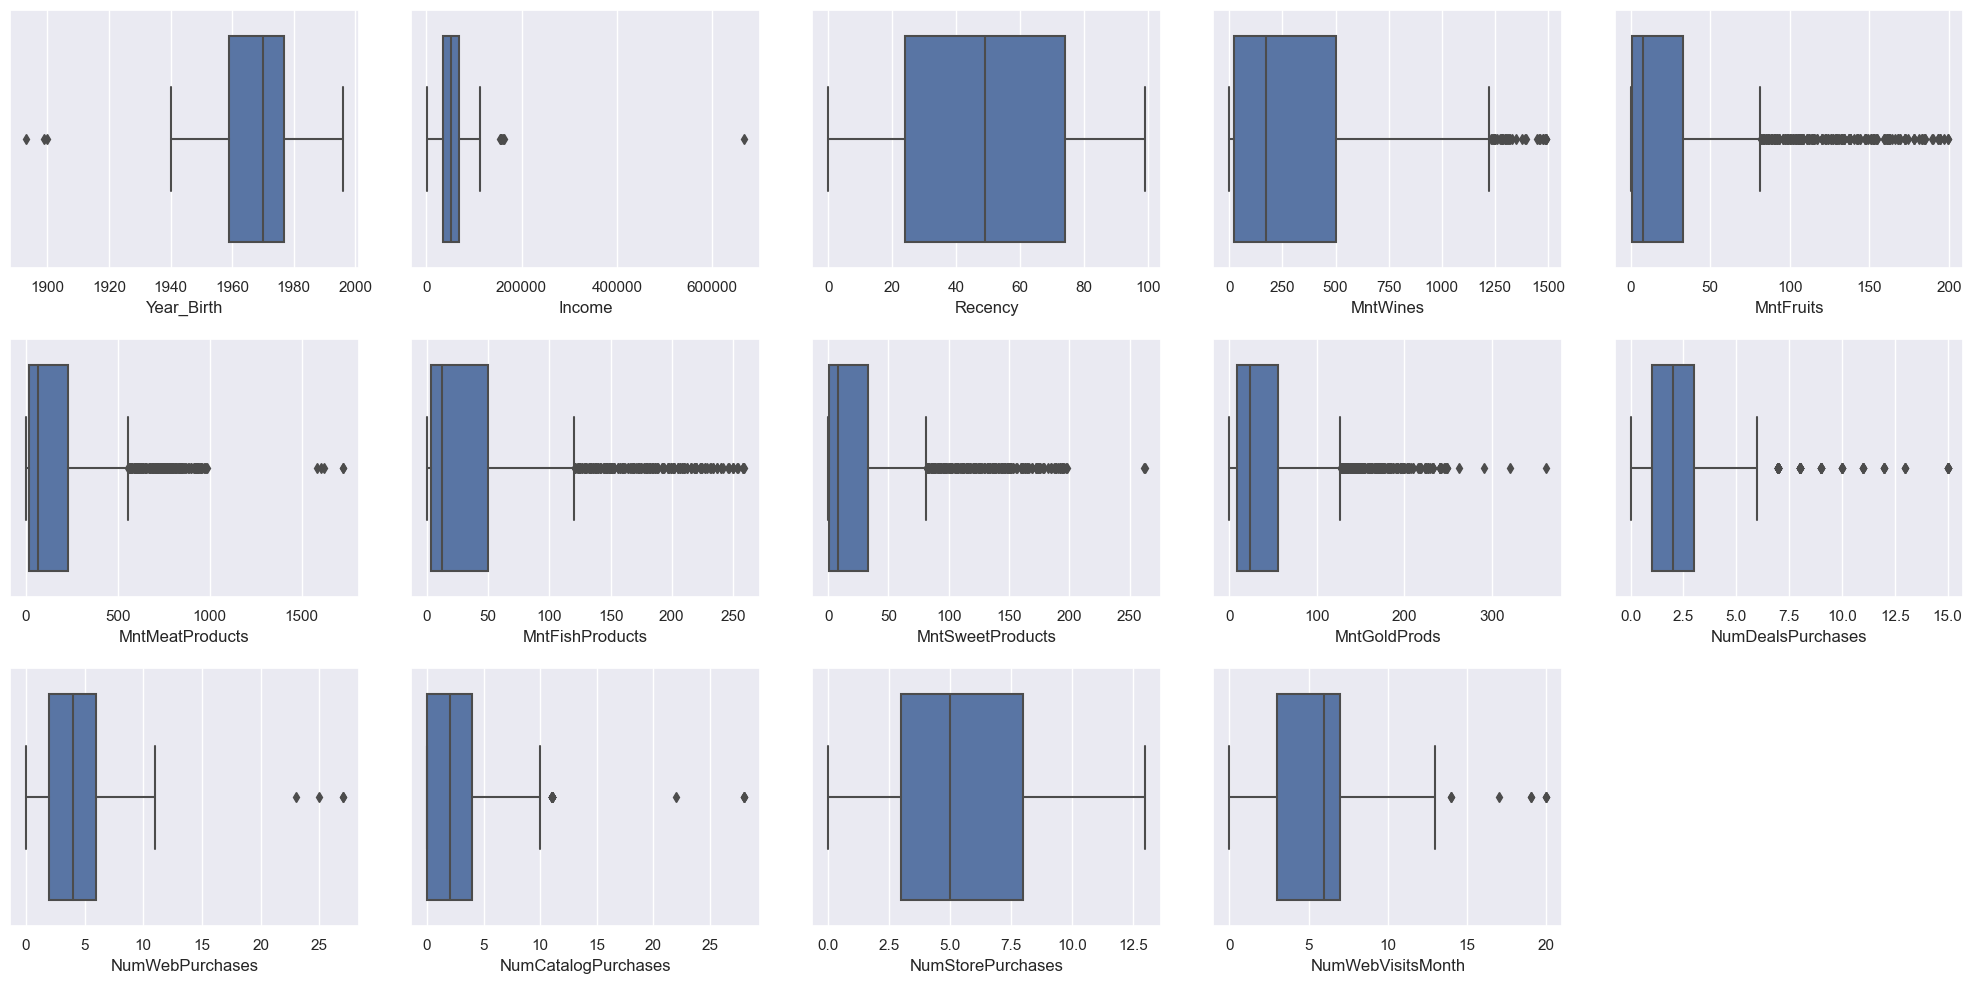

In [88]:
num_vars = ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits',
           'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
           'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
           'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

fig, axs = plt.subplots(nrows =3, ncols= 5, figsize =(20,10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x= var, data=df , ax= axs[i])

fig.tight_layout()

#remove the 15th subplot
fig.delaxes(axs[14])

plt.show()

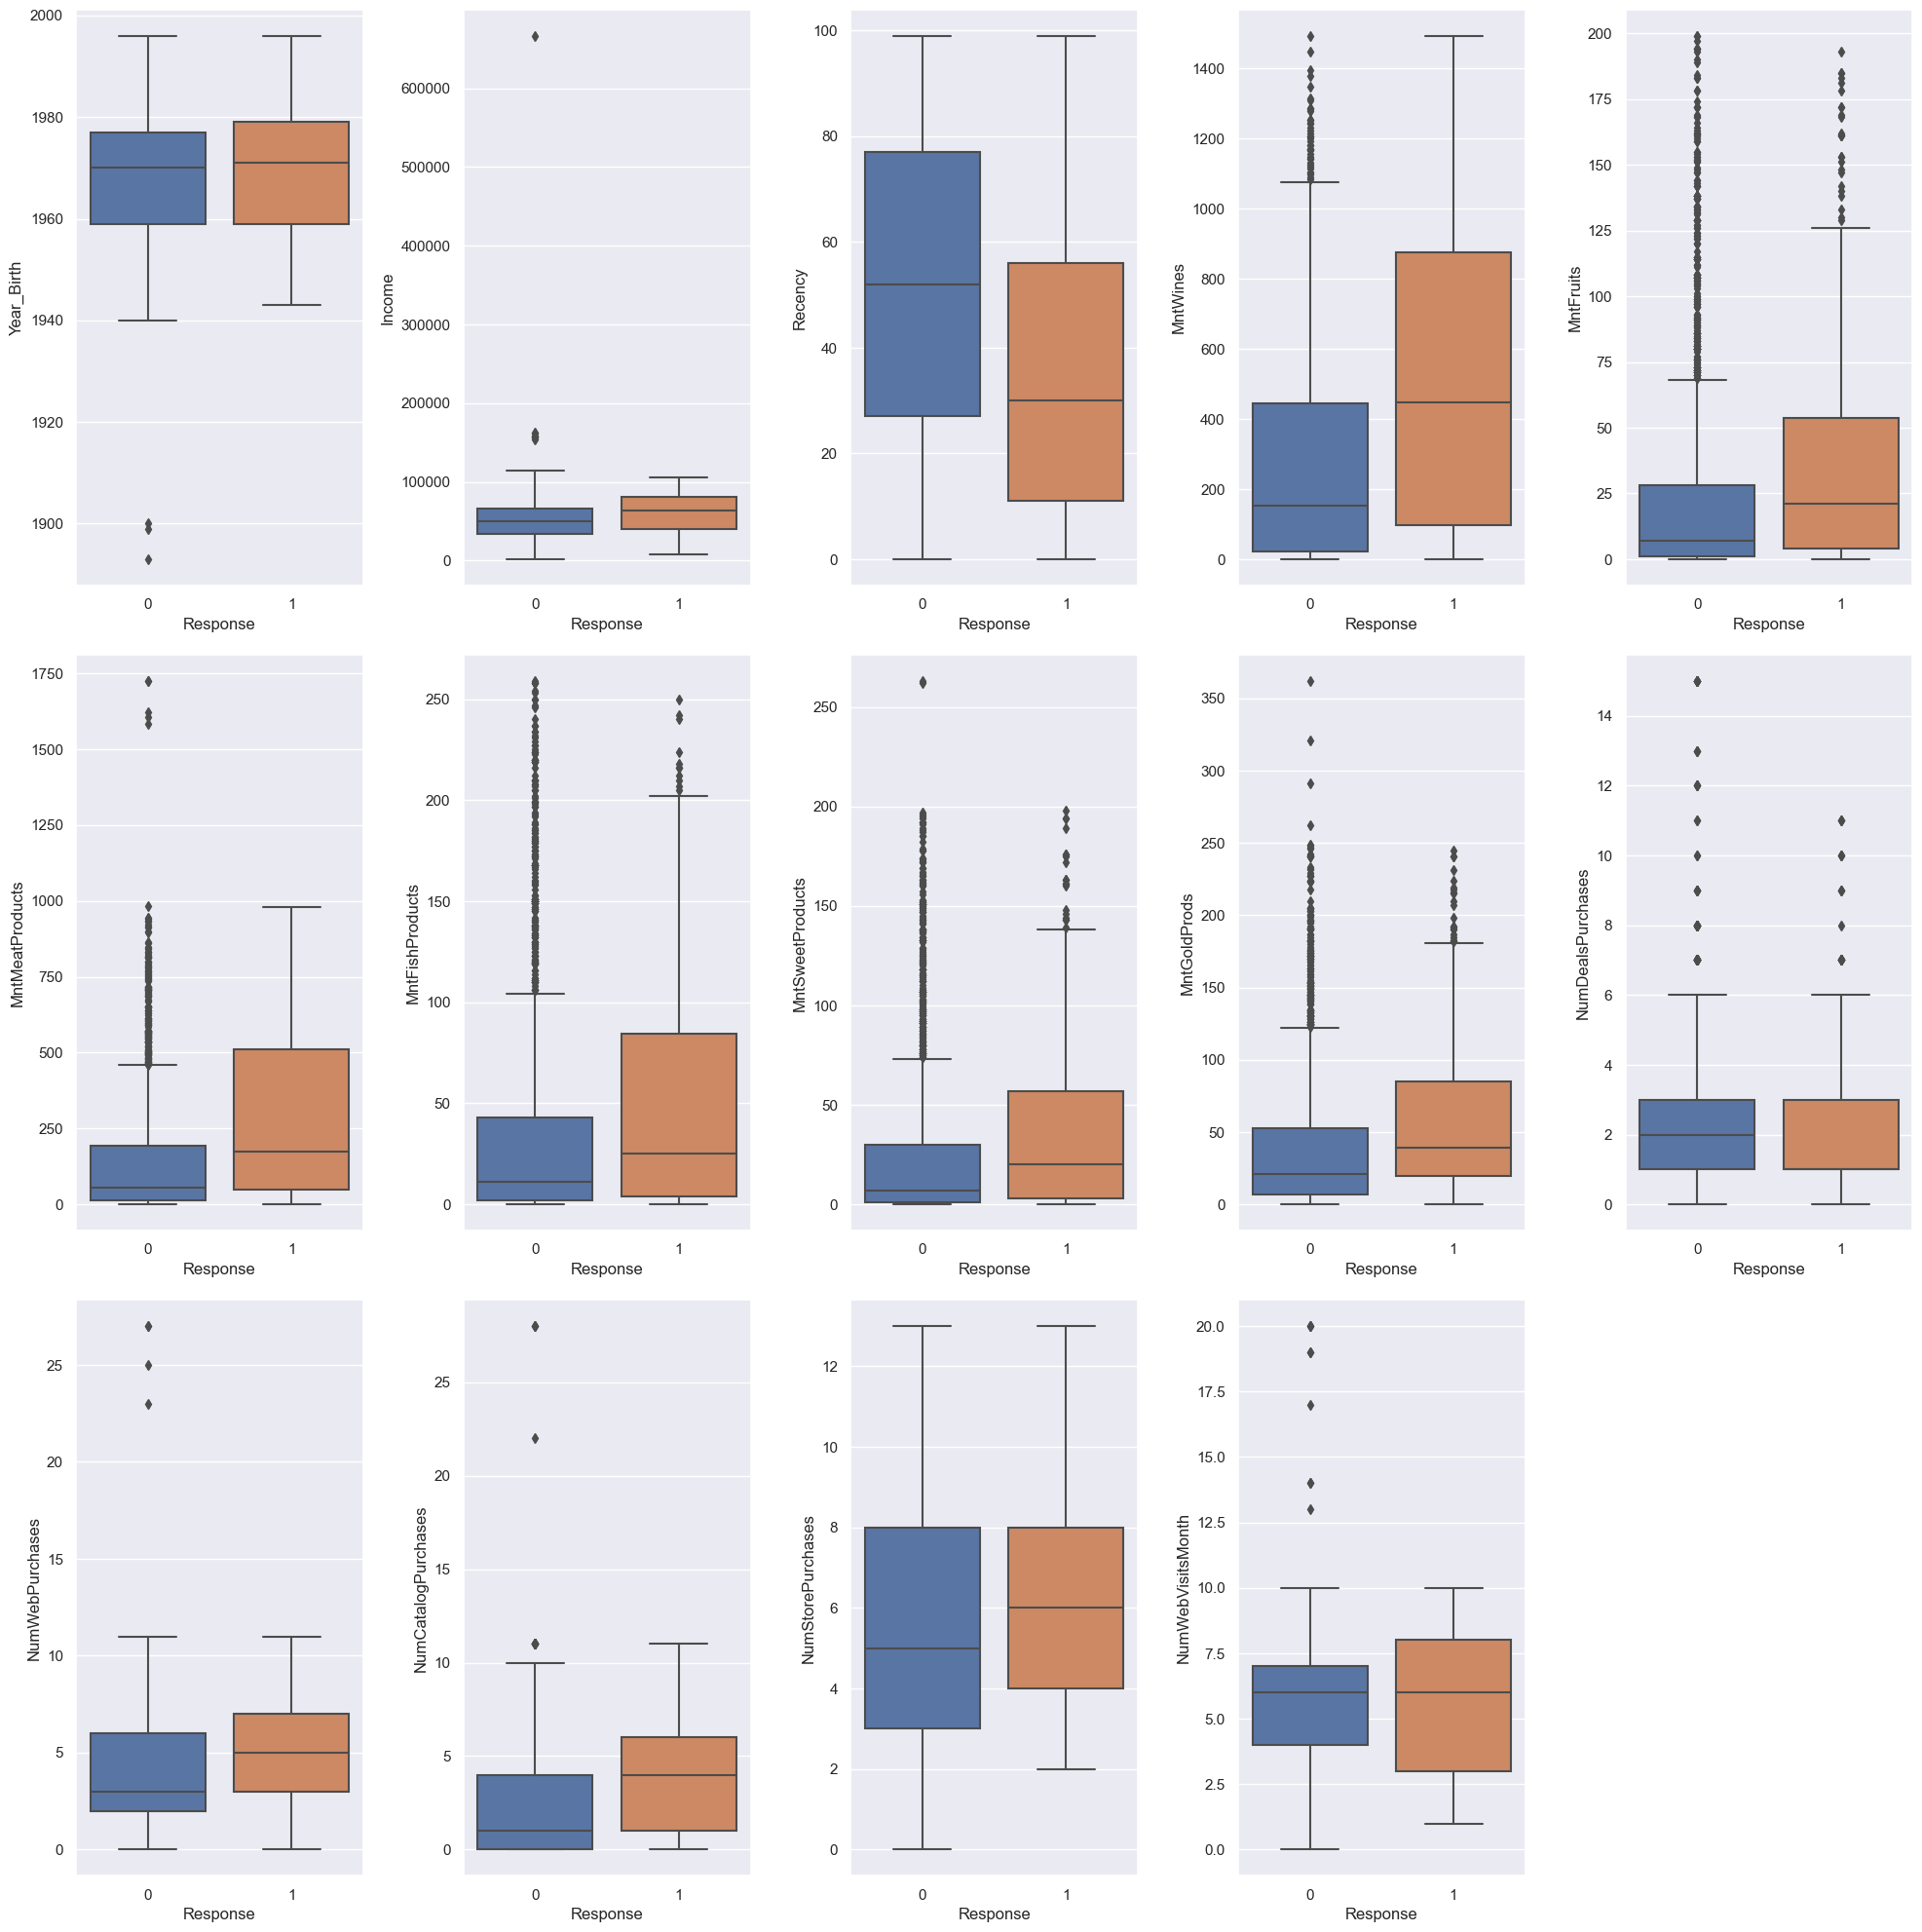

In [89]:
num_vars = ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits',
           'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
           'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
           'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

fig, axs = plt.subplots(nrows = 3, ncols=5, figsize =(20,20))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(y = var, x= 'Response', data=df, ax = axs[i])

fig.tight_layout()

#remove the 15th subplot

fig.delaxes(axs[14])

plt.show()

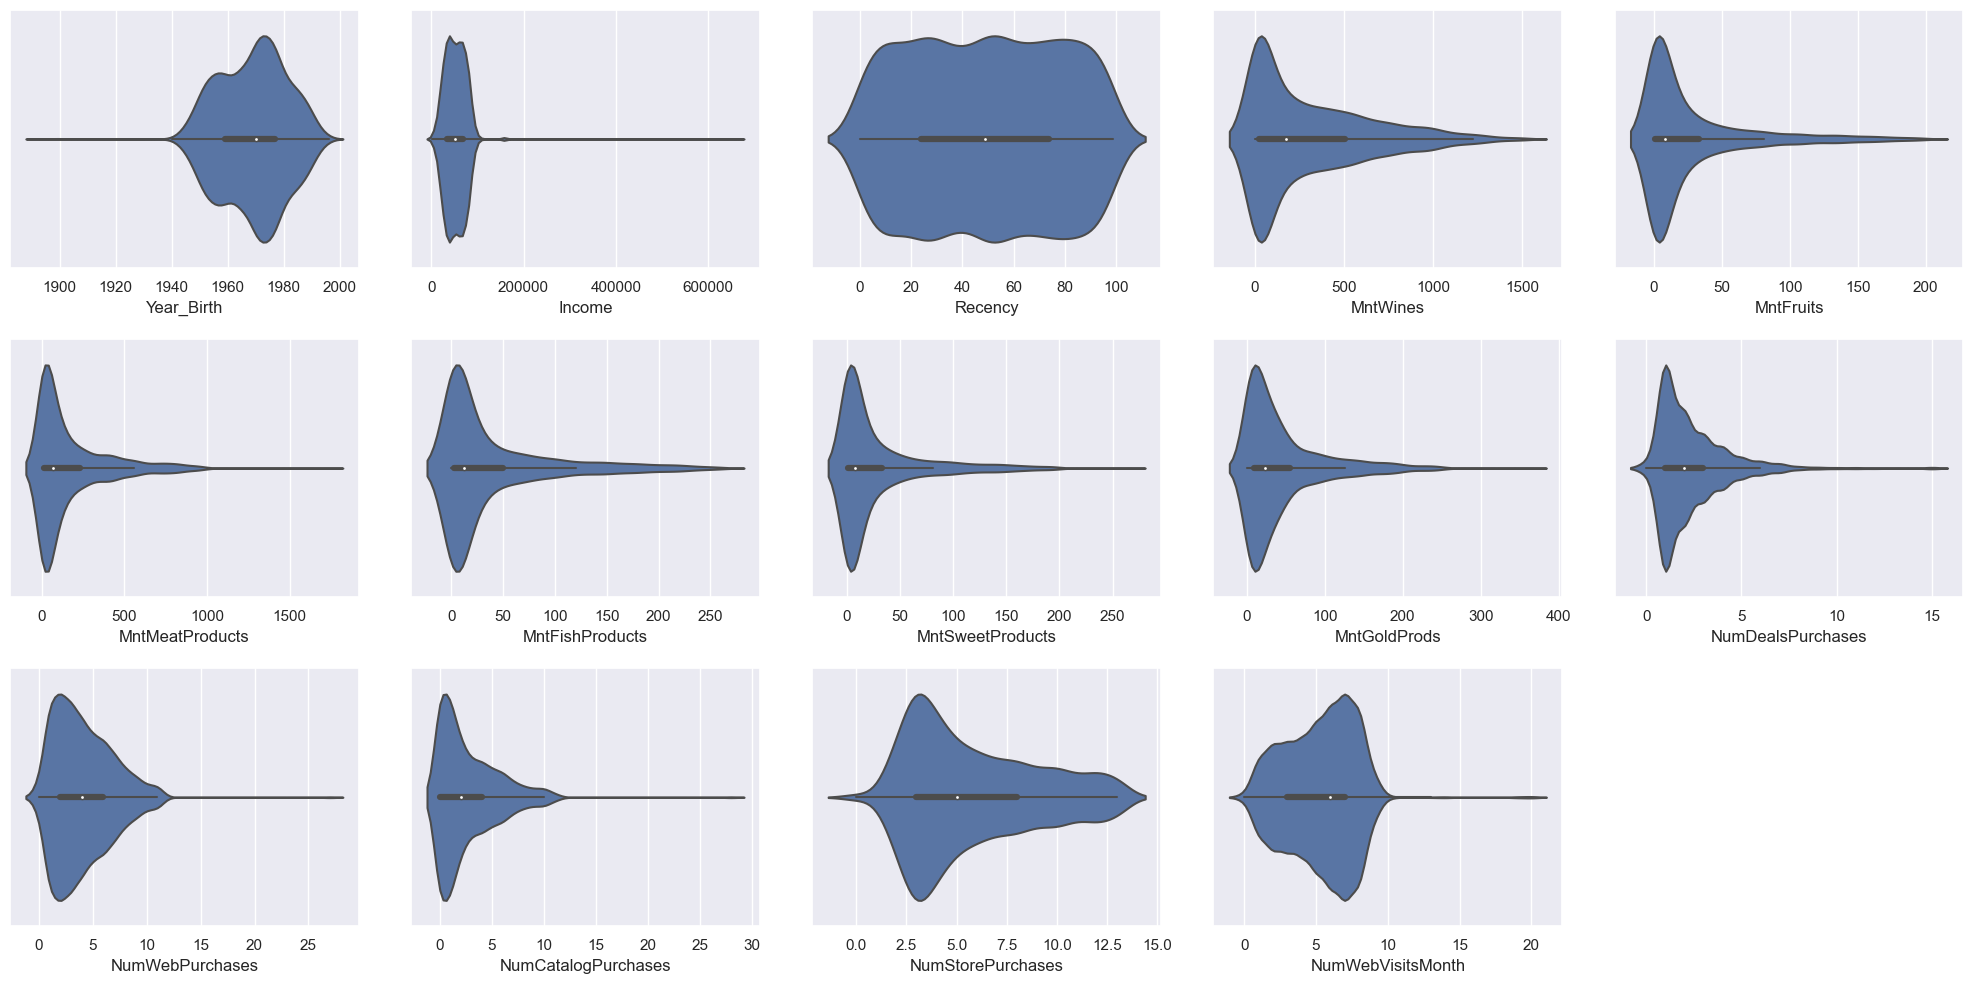

In [90]:
num_vars = ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits',
           'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
           'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
           'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

fig, axs = plt.subplots(nrows= 3, ncols= 5, figsize= (20,10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x= var, data=df , ax= axs[i])

fig.tight_layout()

#remove the 15th plot
fig.delaxes(axs[14])

plt.show()

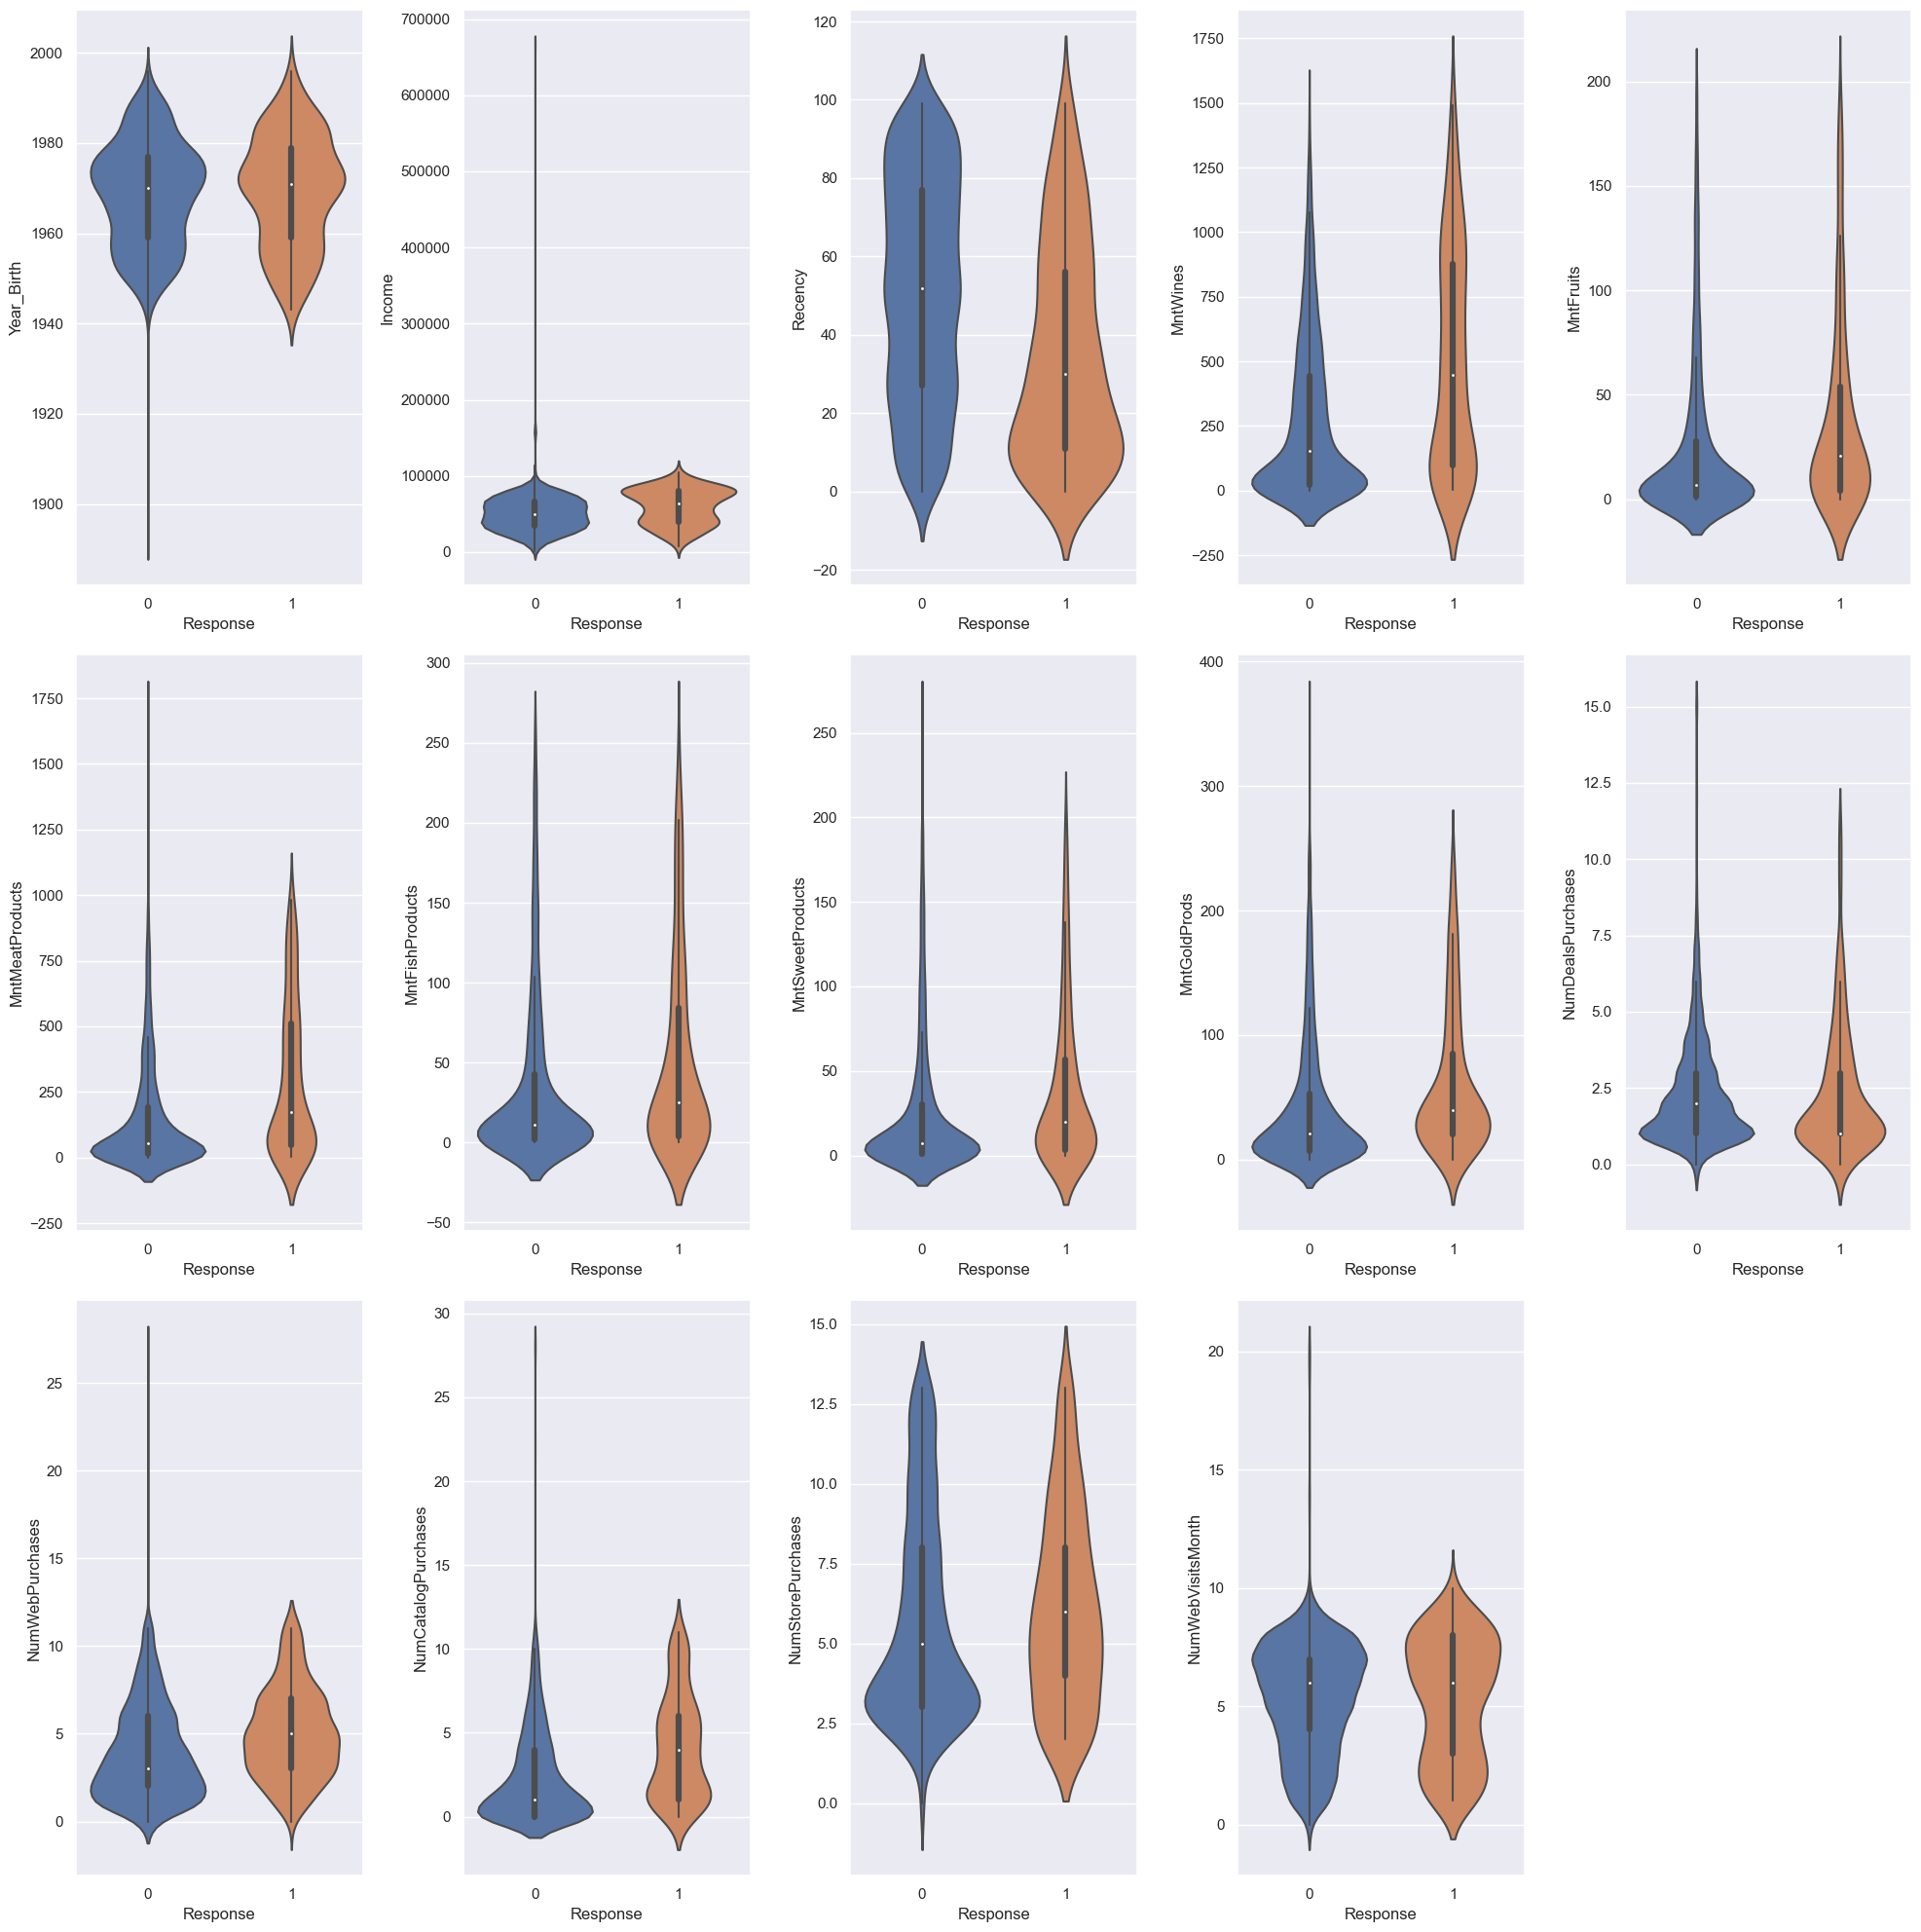

In [91]:
num_vars = ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits',
           'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
           'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
           'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

fig,axs = plt.subplots(nrows = 3, ncols= 5, figsize = (20,20))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(y = var, data=df, x= 'Response', ax= axs[i])

fig.tight_layout()

#remove the 15th plot
fig.delaxes(axs[14])

plt.show()

DATA PREPROCESSING PART2


In [92]:
#check the missing value
check_missing = df.isnull().sum()* 100 /df.shape[0]
check_missing[check_missing >0].sort_values(ascending= False)

Income    1.071429
dtype: float64

In [93]:
df.shape

(2240, 21)

In [94]:
#drop null values as it is only 1%
df.dropna(inplace= True)
df.shape

(2216, 21)

In [95]:
#drop complain column because it is very unbalanced
df.drop(columns= 'Complain', inplace=True)
df.shape

(2216, 20)

Label encoding for each object datatype

In [96]:
#loop over each column in the dataframe where the dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    #print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

Education: ['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']
Marital_Status: ['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']
Dt_Customer: ['2014' '2013' '2012']


In [97]:
#replace 'YOLO' and 'Alone' with 'Single' in the 'Status' column
df['Marital_Status'] = df['Marital_Status'].replace(['YOLO','Alone'], 'Single')
df['Marital_Status'] = df['Marital_Status'].replace(['Together'], 'Married')

In [98]:
#remove Dt_Customer because ots irrelevant for prediction
df.drop(columns= 'Dt_Customer', inplace= True)

TypeError: cannot do positional indexing on Index with these indexers [True] of type bool

TypeError: cannot do positional indexing on Index with these indexers [True] of type bool

In [ ]:
from sklearn import preprocessing

#loop over each column in the dataframe where dtype is 'object'

for col in df.select_dtypes(include=['object']).columns:

    #initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    #fit the encoder to unique values in the column 
    label_encoder.fit(df[col].unique())

    #transform the column using the encoder
    df[col] = label_encoder.transform(df[col])

    #print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

Education: [2 4 0 3 1]
Marital_Status: [1 3 2 4 0]


<Axes: >

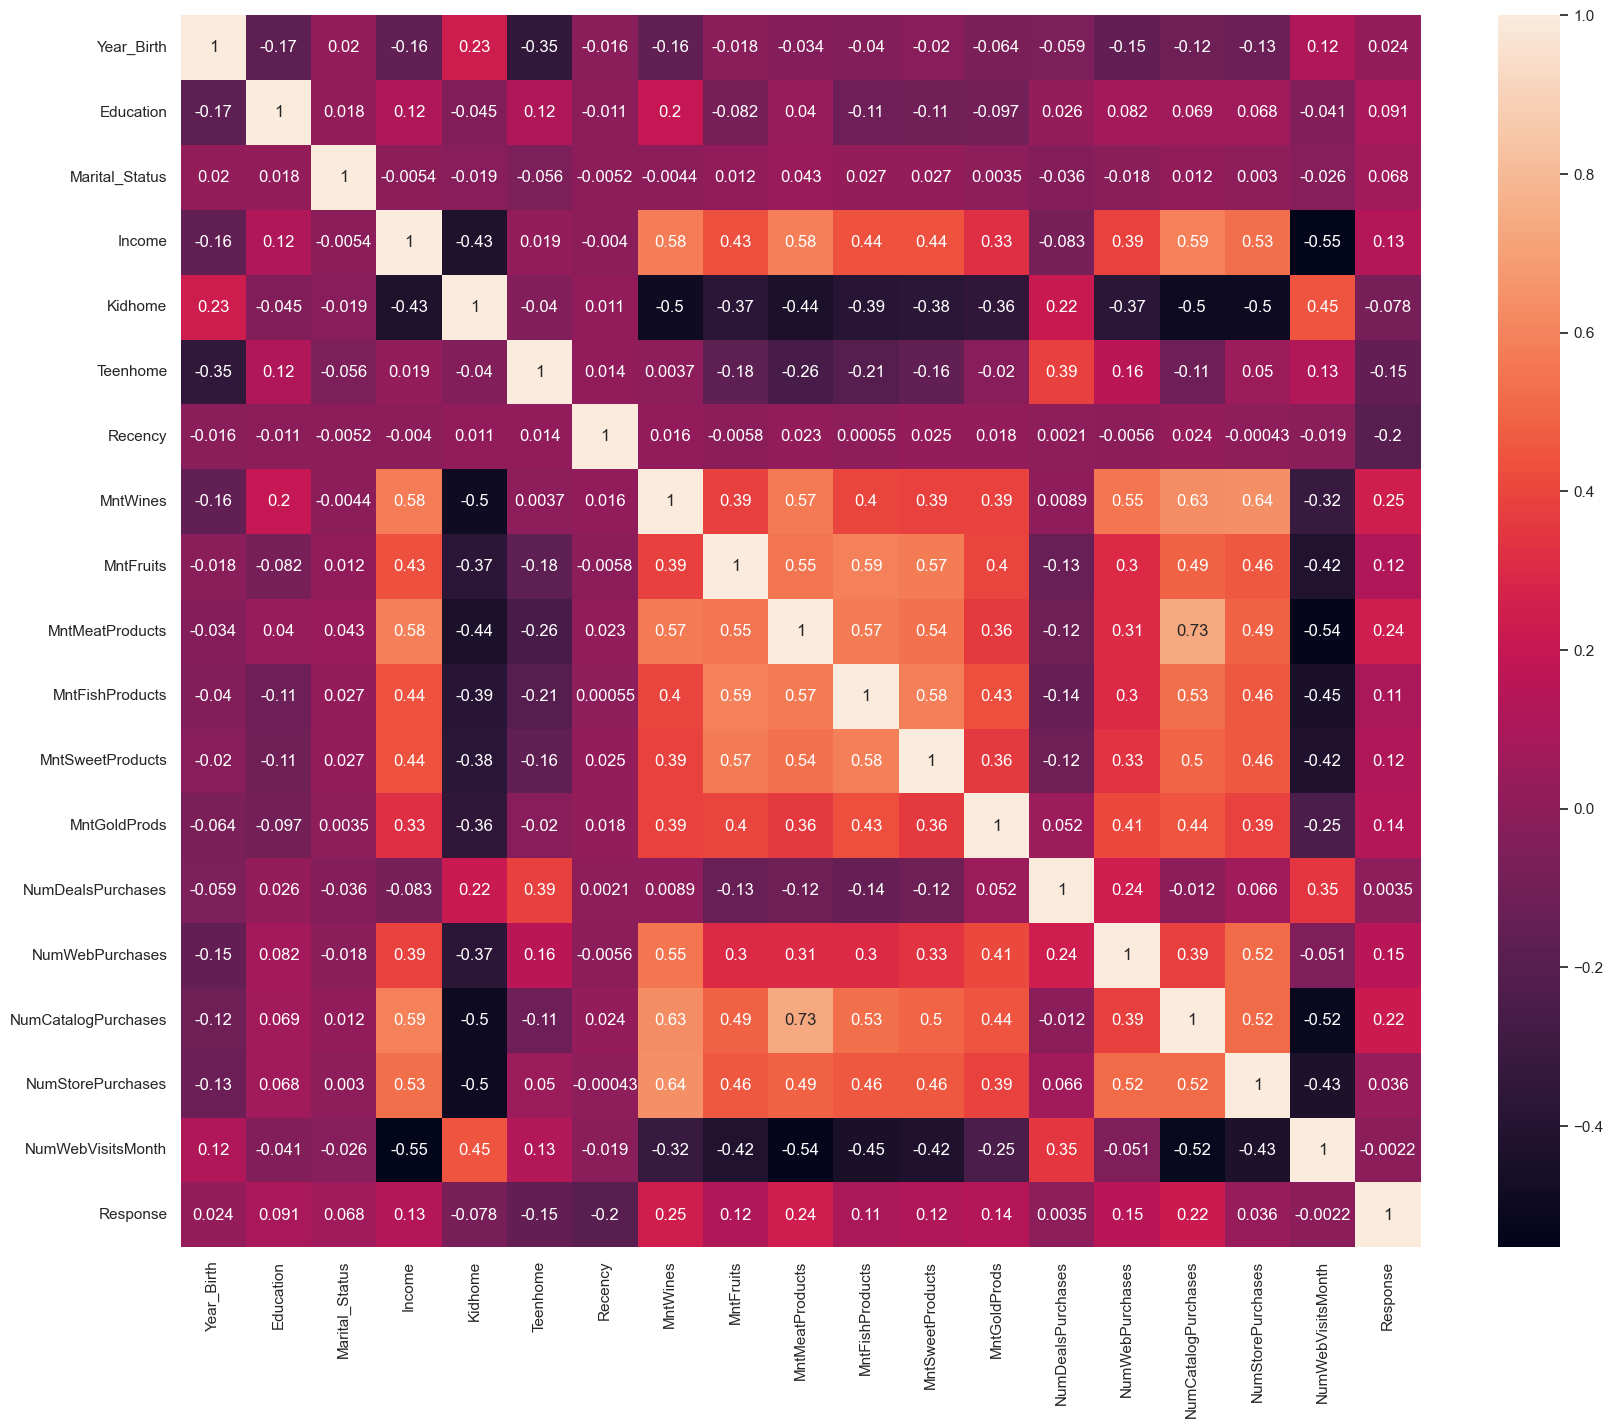

In [ ]:
#correlation heatmap
#print the correlation score each variables
plt.figure(figsize= (20,16))
sns.heatmap(df.corr(), fmt= '.2g', annot = True)

TRAIN TEST SPLIT


In [ ]:
from sklearn.model_selection import train_test_split
#select the features (X) and the target variable(Y)
X = df.drop('Response', axis=1)
Y = df['Response']

#split the data into training and testing data
X_train , X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

REMOVE THE OUTLIER FROM TRAIN DATA USING ZSCORE


In [ ]:
from scipy import stats

#Define the columns for which you want to remove the outliers
selected_columns = ['Year_Birth', 'Income', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
           'MntGoldProds', 'NumDealsPurchases','NumCatalogPurchases']

#calculate the zscores for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

#set a threshold value for outlier detection(eg.3)
threshold = 3

#find the indices of outliers based on threshold
outlier_indices = np.where(z_scores> threshold)[0]

#remove the outliers from the training data
X_train = X_train.drop(X_train.index[outlier_indices])
Y_train = Y_train.drop(Y_train.index[outlier_indices])


DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3,4,5,6,7,8],
    'min_samples_split': [2,3,4],
    'min_samples_leaf':[1,2,3,4],
    'random_state': [0,42],
}

#perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

#print the best hyperparameters
print(grid_search.best_params_)

'''Understand the code from dtree part'''

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 3, 'random_state': 0}


'Understand the code from dtree part'

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=8, min_samples_leaf=1, min_samples_split=3, class_weight='balanced')
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8,
                       min_samples_split=3, random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score
dtree.fit(X_train, Y_train)
y_pred = dtree.predict(X_test)
print("Accuracy_score: ", round(accuracy_score(Y_test,y_pred)*100 ,2),"%")

Accuracy_score:  77.25 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score,precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score: ',(f1_score(Y_test, y_pred, average='micro')))
print('Precision Score: ',(precision_score(Y_test, y_pred,average='micro')))
print('Recall Score: ', (recall_score(Y_test, y_pred, average='micro')))
print('Jaccard Score: ', (jaccard_score(Y_test, y_pred, average='micro')))
print('Log Loss :', (log_loss(Y_test, y_pred)))

F-1 Score:  0.7725225225225225
Precision Score:  0.7725225225225225
Recall Score:  0.7725225225225225
Jaccard Score:  0.6293577981651376
Log Loss : 8.199119352028902


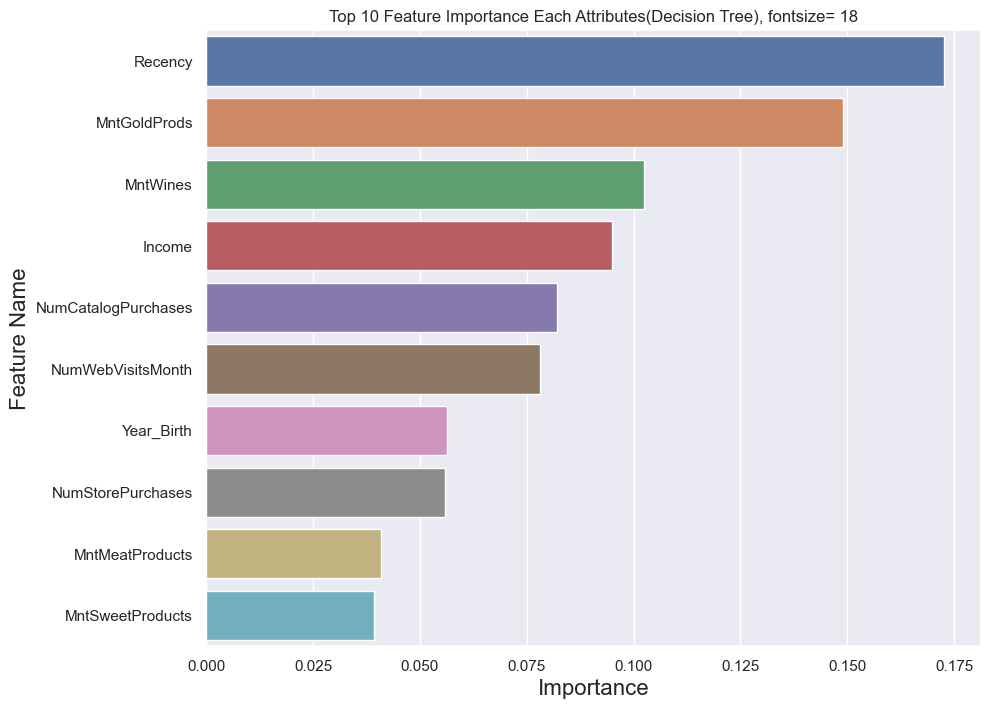

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name" :X_train.columns,
    "Importance": dtree.feature_importances_
})

fi = imp_df.sort_values(by = "Importance", ascending = False)
fi2 = fi.head(10)
plt.figure(figsize= (10,8))
sns.barplot(data= fi2, x="Importance", y="Feature Name")
plt.title('Top 10 Feature Importance Each Attributes(Decision Tree), fontsize= 18')
plt.xlabel('Importance', fontsize= 16)
plt.ylabel('Feature Name', fontsize=16)
plt.show()

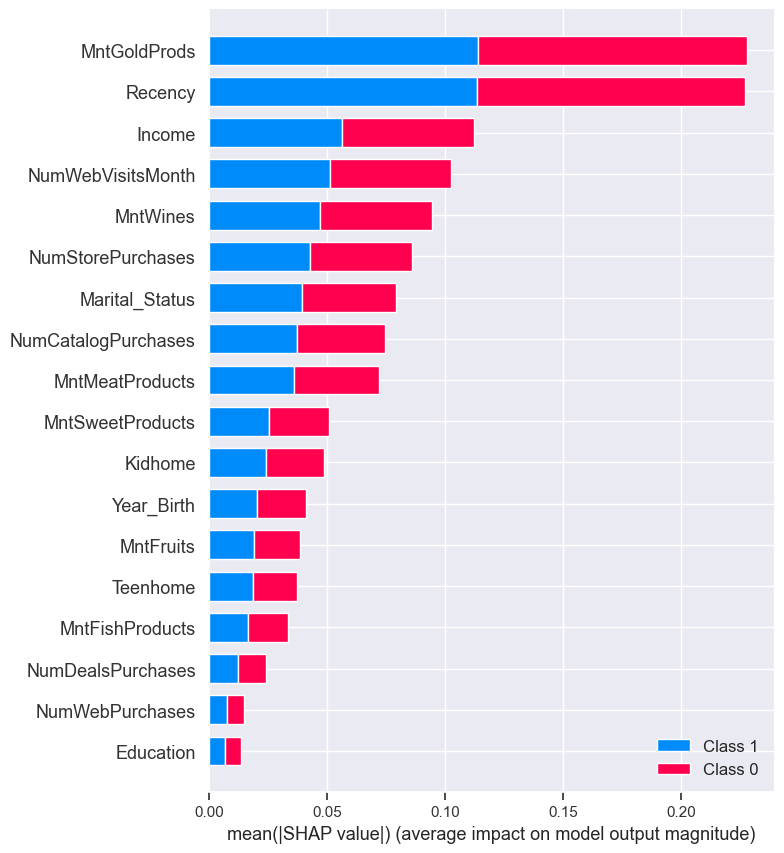

In [ ]:
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values , X_test)

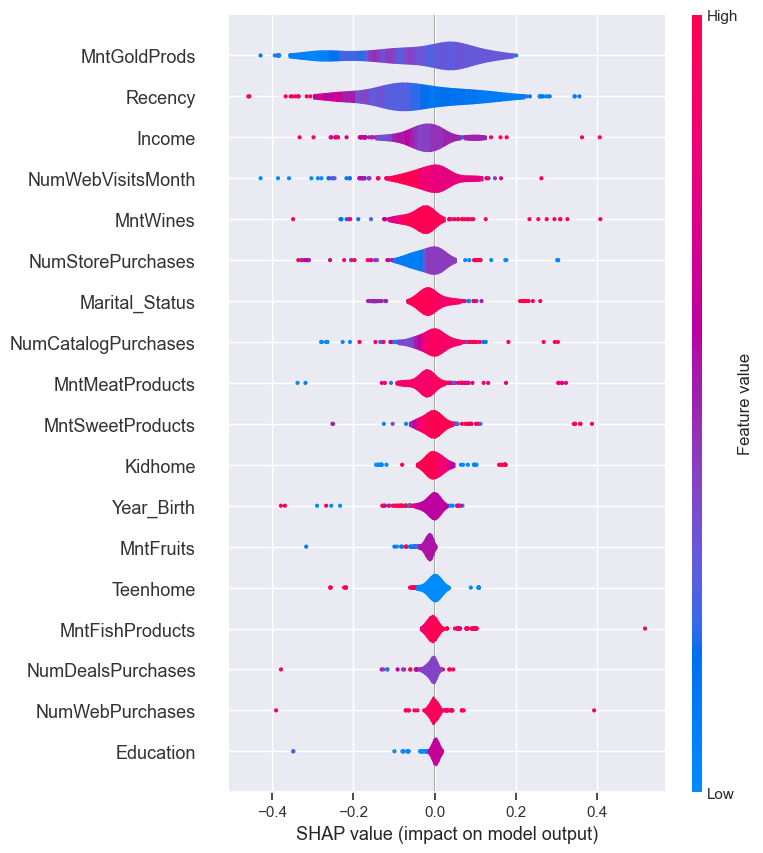

In [ ]:
#compute shap values
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names=X_test.columns, plot_type="violin")


Text(0.5, 1.0, 'Accuracy Score for Decision Tree : 0.7725225225225225')

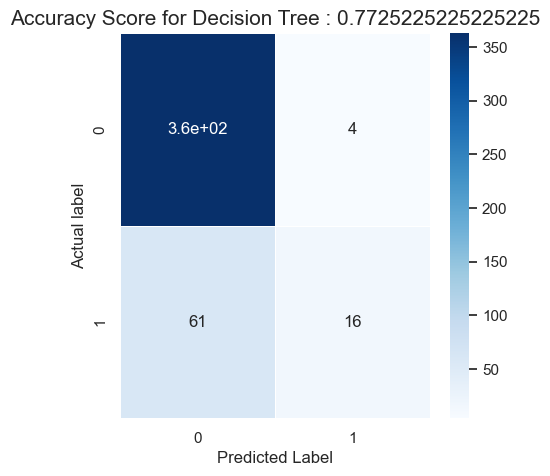

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm, linewidths=.5, annot= True, cmap="Blues")
plt.ylabel('Actual label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score for Decision Tree : {0}'.format(dtree.score(X_test, Y_test))
plt.title(all_sample_title, size= 15)

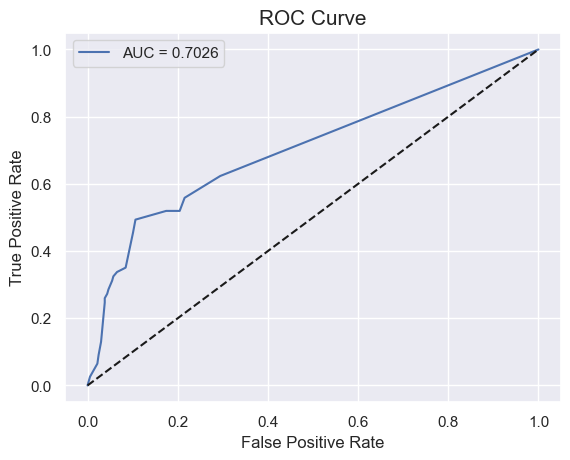

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(Y_test), columns= ['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = Y_test.index

fpr, tpr , tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

RANDOM FOREST


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(class_weight= 'balanced')
param_grid = {
    'n_estimators': [100,200],
    'max_depth': [None, 5,10],
    'max_features': ['sqrt', 'log2', None],
    'random_state':[0,42]
}

#perform a grid search with cross_validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

#print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 42}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 200, class_weight='balanced')
rfc.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [ ]:
y_pred = rfc.predict(X_test)
print("accuracy_score : ", round(accuracy_score(Y_test, y_pred)*100,2), "%")

accuracy_score :  85.36 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(Y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(Y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(Y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(Y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(Y_test, y_pred)))

F-1 Score :  0.8536036036036037
Precision Score :  0.8536036036036037
Recall Score :  0.8536036036036037
Jaccard Score :  0.7445972495088409
Log Loss :  5.276660969127511


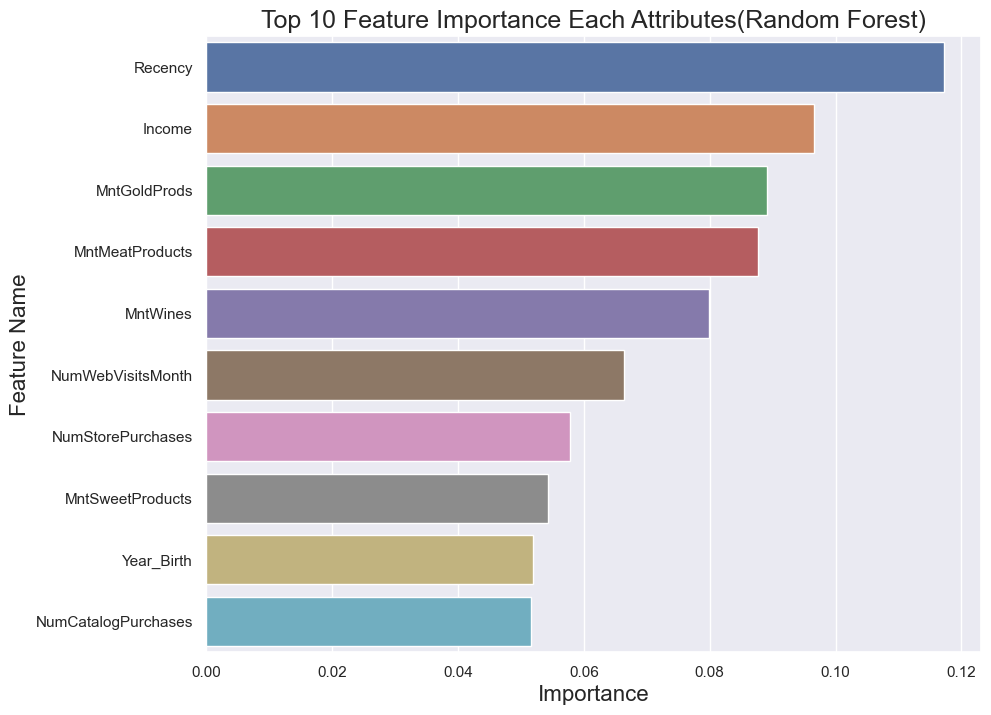

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name ": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by= "Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x= 'Importance', y='Feature Name ')
plt.title('Top 10 Feature Importance Each Attributes(Random Forest)', fontsize =18)
plt.xlabel('Importance', fontsize = 16)
plt.ylabel('Feature Name', fontsize = 16)
plt.show()

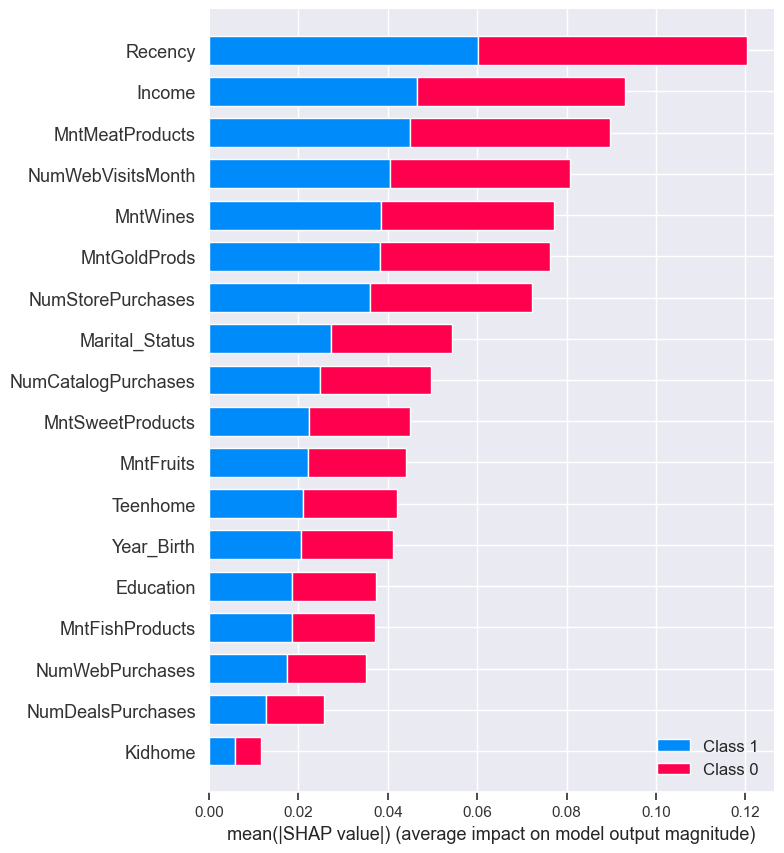

In [ ]:
import shap
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

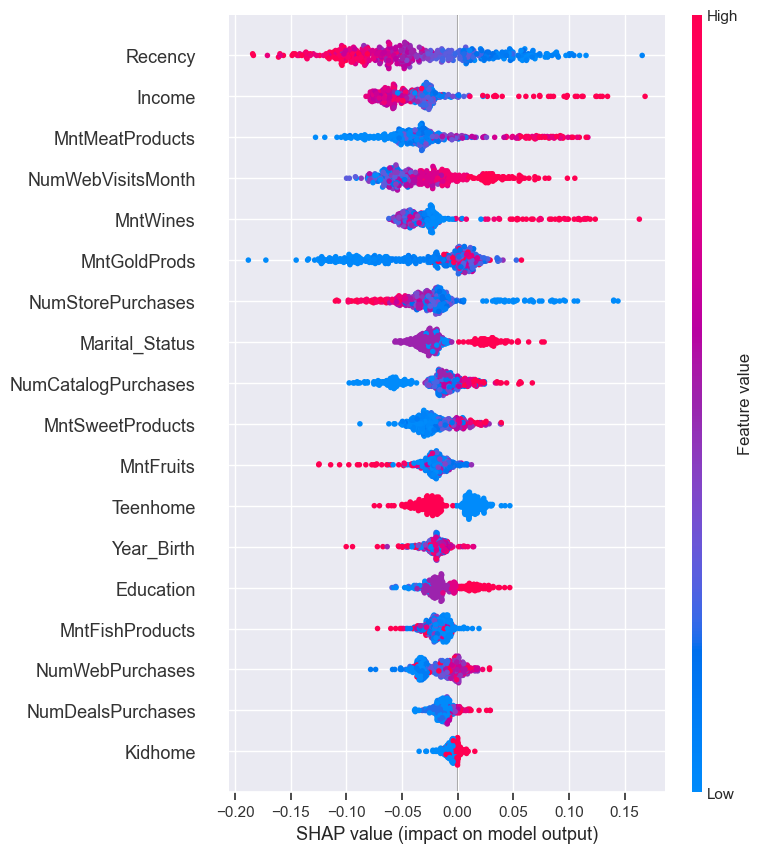

In [ ]:
#compute Shap Values
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names= X_test.columns)

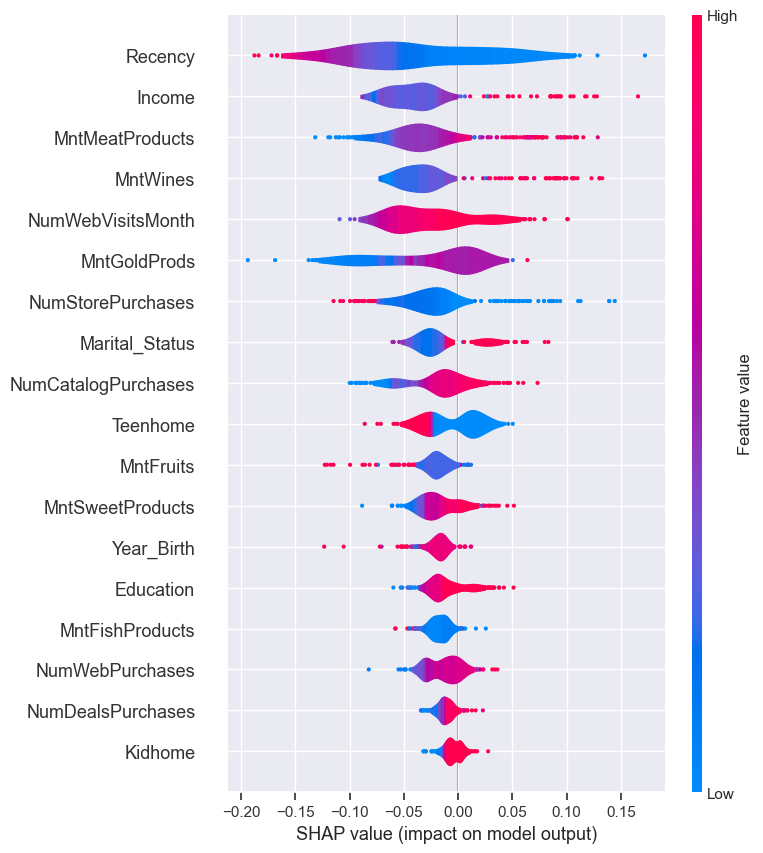

In [ ]:
#compute shap values
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names= X_test.columns, plot_type='violin')


Text(0.5, 1.0, 'accuracy_score for random forest: 0.8536036036036037')

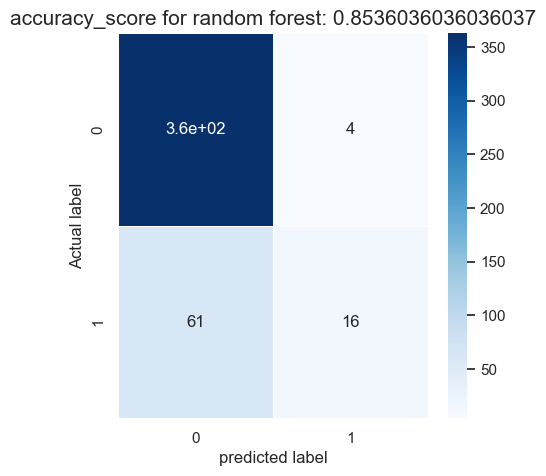

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm, linewidths=.5, annot=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('predicted label')
all_sample_title = "accuracy_score for random forest: {0}".format(rfc.score(X_test, Y_test))
plt.title(all_sample_title, size = 15)

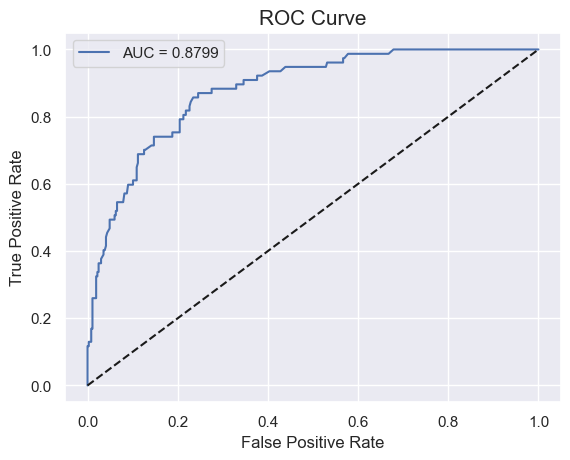

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(Y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = Y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()